In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn import datasets

In [5]:
iris = datasets.load_iris()
X = iris['data'][:,(2,3)]

scaler = StandardScaler()
Xstan = scaler.fit_transform(X)

df = pd.DataFrame(data=Xstan, columns=['petal length','petal width'])
df['target'] = iris['target']
df = df[df['target']!=2] 
df.head()

,petal length,petal width,target
0,-1.340227,-1.315444,0
1,-1.340227,-1.315444,0
2,-1.397064,-1.315444,0
3,-1.283389,-1.315444,0
4,-1.340227,-1.315444,0


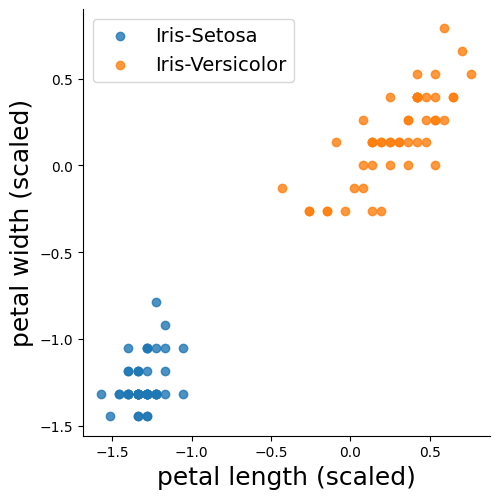

In [11]:
sns.lmplot(x='petal length',y='petal width',hue='target',data=df, fit_reg=False, legend=False)
plt.legend(['Iris-Setosa','Iris-Versicolor'], fontsize = 14)
plt.xlabel('petal length (scaled)', fontsize = 18)
plt.ylabel('petal width (scaled)', fontsize = 18)
plt.show()

In [12]:
svc = LinearSVC(C=1,loss="hinge")
svc.fit(data[['petal length','petal width']].values,data['target'].values)

C:\Users\emoha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(C=1, loss='hinge')

In [23]:
from sklearn.datasets import make_moons
X,y=make_moons(noise=0.1, random_state=2) # fix random_state to make sure it produces the same dataset everytime. Remove it if you want randomized dataset.
data = pd.DataFrame(data = X, columns=['x1','x2'])
data['y']=y
data.head()

,x1,x2,y
0,1.327241,-0.222425,1
1,-0.429116,1.071136,0
2,0.014901,0.003679,1
3,0.000352,1.087226,0
4,0.676553,0.857039,0


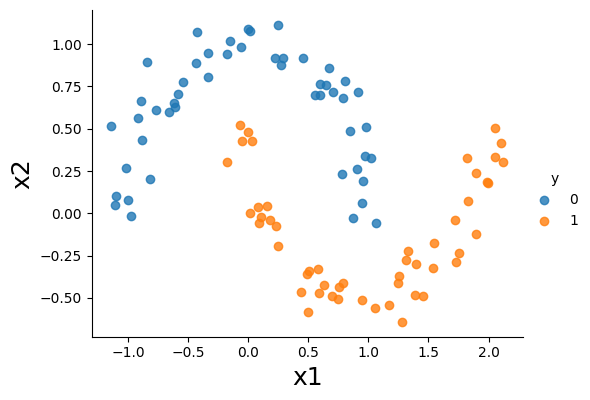

In [25]:
sns.lmplot(x='x1', y='x2', hue='y', data=data, fit_reg=False, legend=True, height=4, aspect=4/3)
plt.xlabel('x1', fontsize=18)
plt.ylabel('x2', fontsize=18)
plt.show()

In [27]:
# tranform the features, here we use a 3rd degree polynomials
from sklearn.preprocessing import PolynomialFeatures
print('Shape of X before tranformation:', X.shape)
poly = PolynomialFeatures(degree = 3, include_bias=False)
Xpoly = poly.fit_transform(X)
print('Shape of X aftere tranformation:', Xpoly.shape)

Shape of X before tranformation: (100, 2)
Shape of X aftere tranformation: (100, 9)


In [28]:
# standardize the data
scaler = StandardScaler()
Xpolystan = scaler.fit_transform(Xpoly)

In [29]:
svm_clf = LinearSVC(C=10,loss='hinge',max_iter=10000)
svm_clf.fit(Xpolystan,y)
print(svm_clf.intercept_, svm_clf.coef_)


[0.14736905] [[-1.48195235 -0.38935842 -3.63171037 -0.24402706  0.84162261  6.20758829
  -0.98197258  0.7082966  -1.94865328]]


C:\Users\emoha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [30]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [31]:
xx0, xx1 = make_meshgrid(X0, X1)
# polynomial transformation and standardization on the grids
xgrid = np.c_[xx0.ravel(), xx1.ravel()]
xgridpoly = poly.transform(xgrid)
xgridpolystan = scaler.transform(xgridpoly)
# prediction
Z = xgridpolystan.dot(svm_clf.coef_[0].reshape(-1,1)) + svm_clf.intercept_[0] # wx + b
#Z = svm_clf.predict(xgridpolystan)
Z = Z.reshape(xx0.shape)

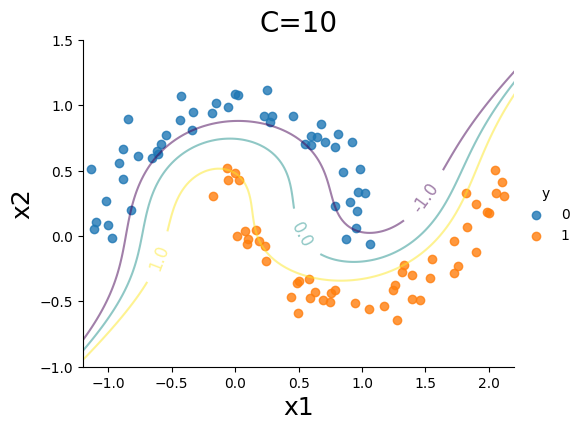

In [33]:
sns.lmplot(x='x1', y='x2', hue='y', data=data, fit_reg=False, legend=True, height=4, aspect=4/3)
CS = plt.contour(xx0, xx1, Z, alpha=0.5, levels=[-1, 0, 1])
plt.clabel(CS, inline=1, levels=[-1.0, 0, 1.0], fmt='%1.1f', fontsize=12, manual=[(1.5, 0.3), (0.5, 0.0), (-0.5, -0.2)])
plt.xlim(-1.2,2.2)
plt.ylim(-1,1.5)
plt.title('C=10', fontsize = 20)
plt.xlabel('x1', fontsize = 18)
plt.ylabel('x2', fontsize = 18)
plt.show()

In [ ]:
svm_clf.score()